## Heart Disease Prediction

### Importing Dependincies

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load data set 

In [184]:
heart = pd.read_csv("heart_disease_data.csv")

df = heart.copy()

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [185]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [186]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [187]:
correlation = df.corr()


In [188]:
df.isna().any().any()

False

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [190]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

### Visualization

<AxesSubplot:>

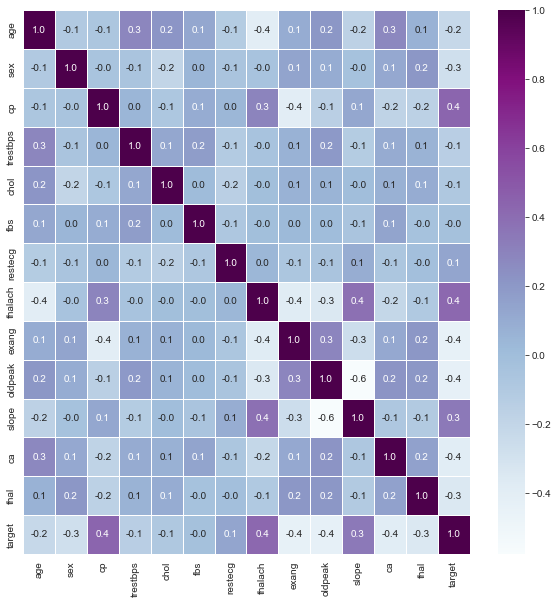

In [191]:

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap="BuPu", annot=True, fmt=".1f", linewidths=.5)

### Test Split

In [192]:
X = df.drop("target", axis=1)
y = df["target"].values

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Model Training and Evalutaion

In [194]:
model = SVC()
lg = LogisticRegression()

model.fit(X_train, y_train)
lg.fit(X_train, y_train)

C:\Users\gulse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [195]:
acc = model.score(X_test, y_test)
lg_acc = lg.score(X_test, y_test)

prediction_score = model.predict(X_test)
lg_prediction_score = lg.predict(X_test)
print("Accuracy is: ", acc)
print("LG Accuracy is: ", lg_acc)

Accuracy is:  0.7049180327868853
LG Accuracy is:  0.8852459016393442


In [196]:
metrics.confusion_matrix(y_test, prediction_score)

array([[15, 14],
       [ 4, 28]], dtype=int64)

In [197]:
metrics.confusion_matrix(y_test, lg_prediction_score)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [198]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2,)

input_data_as_array = np.asarray(input_data)

input_data_as_array = input_data_as_array.reshape(1, -1)



In [199]:
model.predict(input_data_as_array)

C:\Users\gulse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [200]:
lg.predict(input_data_as_array)

C:\Users\gulse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [201]:
df.iloc[177]

age          64.0
sex           1.0
cp            2.0
trestbps    140.0
chol        335.0
fbs           0.0
restecg       1.0
thalach     158.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        0.0
Name: 177, dtype: float64